In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import voxart

In [3]:
test_vox2 = voxart.Design.from_size(7)
for i in [0, 6]:
    test_vox2.vox[i, 0, :] = 1
    test_vox2.vox[i, 6, :] = 1
    test_vox2.vox[i, :, 0] = 1
    test_vox2.vox[i, :, 6] = 1
for i in [6]:
    test_vox2.vox[0, i, :] = 1
    test_vox2.vox[6, i, :] = 1
    test_vox2.vox[:, i, 0] = 1
    test_vox2.vox[:, i, 6] = 1
display(test_vox2.vox.sum())
test_vox2._vox

58

array([[[1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


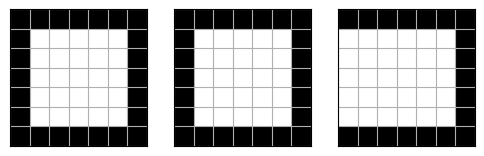

In [4]:
test_vox2.projections_fig()

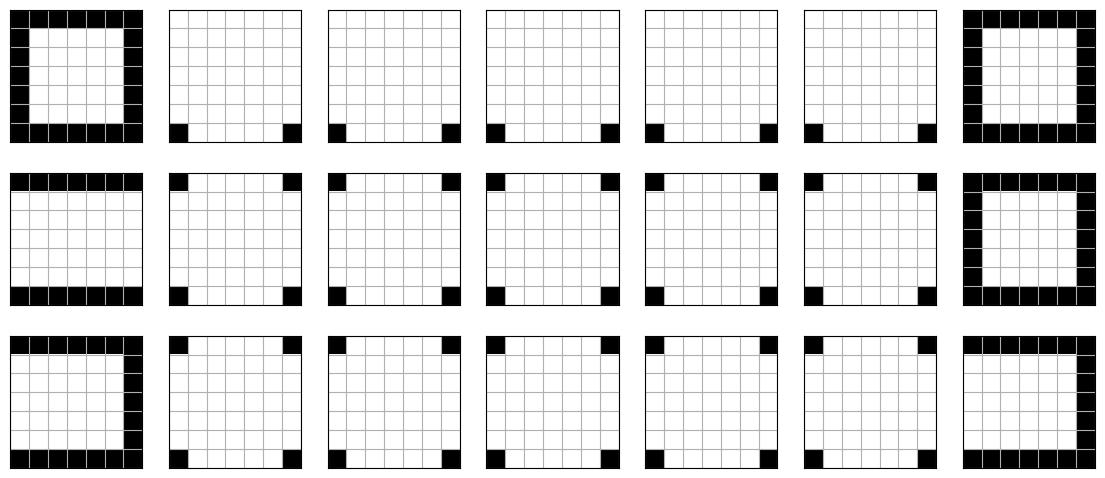

In [5]:
test_vox2.slices_fig()

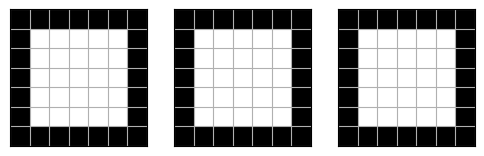

In [6]:
g = voxart.Goal.from_size(7)
g.add_frame()
g.fig()

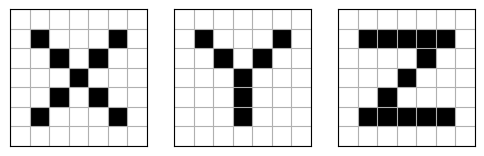

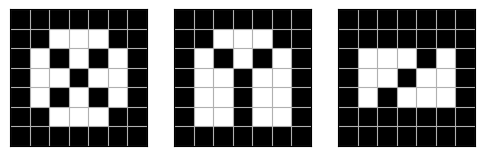

In [7]:
test_goal = voxart.Goal.from_arrays(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
)
display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())

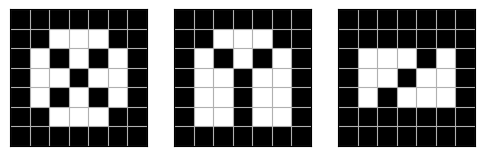

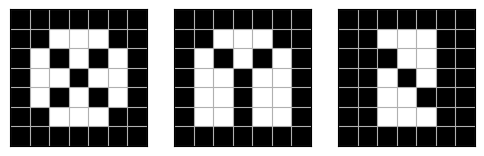

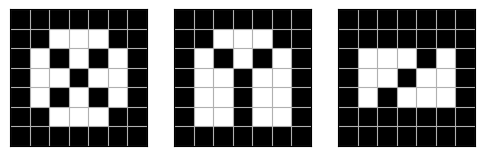

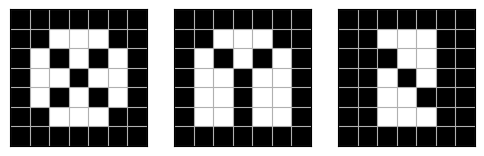

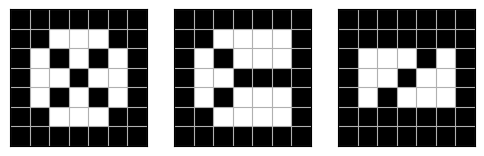

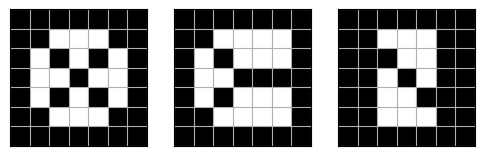

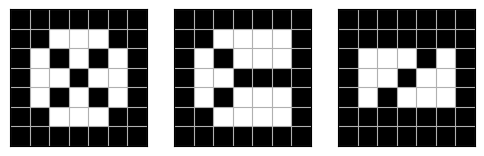

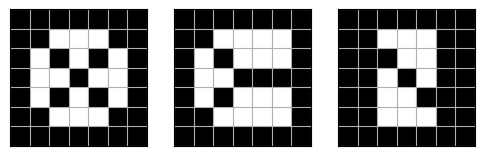

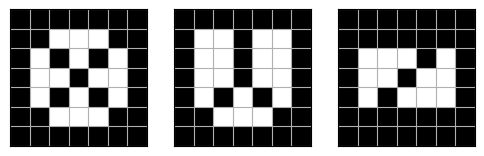

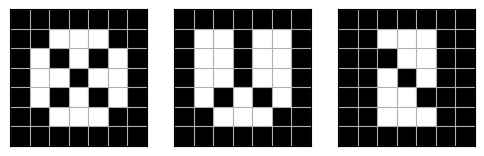

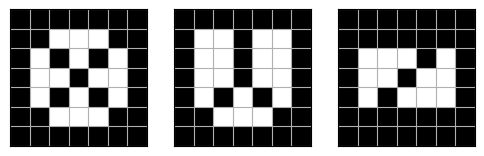

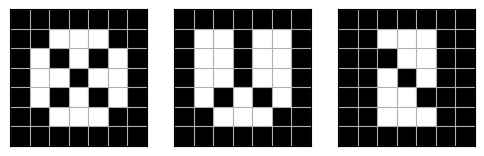

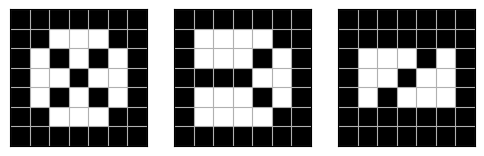

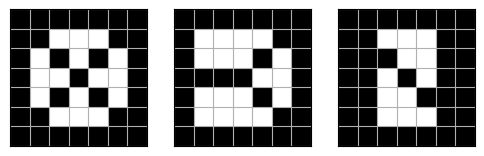

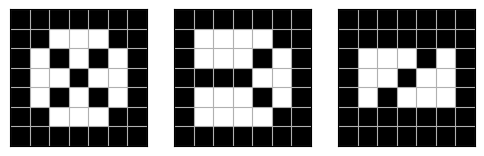

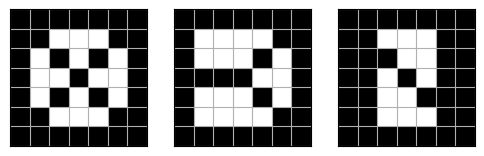

In [8]:
for g in test_goal.rotations():
    display(g.fig())

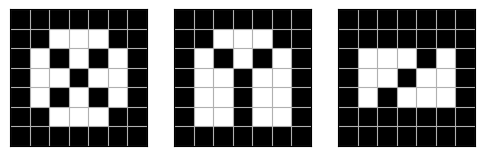

134

In [9]:
design = test_goal.create_base_design()
display(design.projections_fig())
display(design.vox.sum())

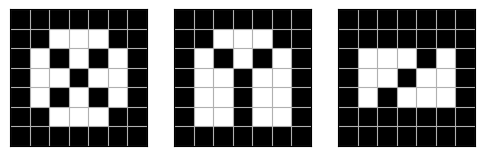

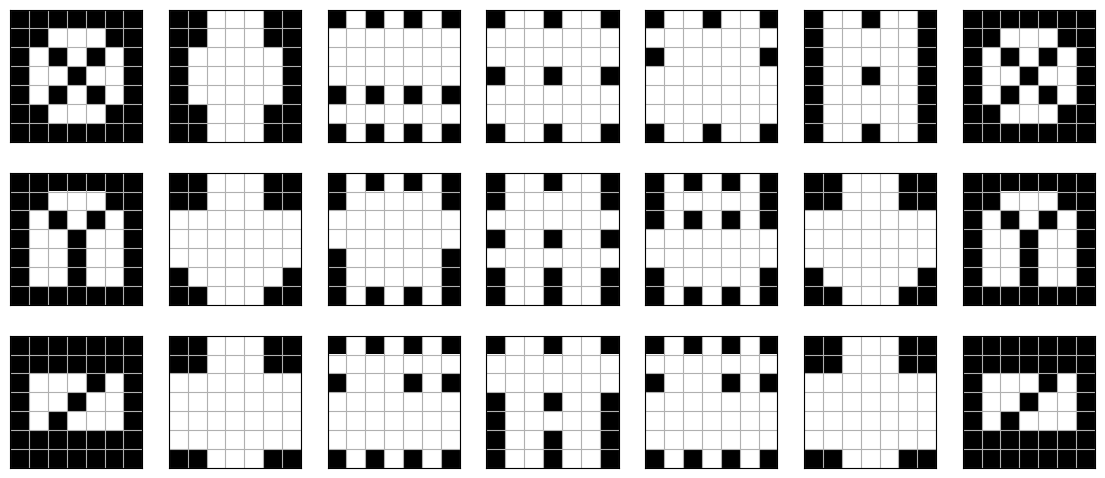

In [10]:
y, z = np.where(test_goal._goals[0] == 0)
design.vox[:, y, z] = 0
x, z = np.where(test_goal._goals[1] == 0)
design.vox[x, :, z] = 0
x, y = np.where(test_goal._goals[2] == 0)
design.vox[x, y, :] = 0
display(design.projections_fig())
display(design.slices_fig())

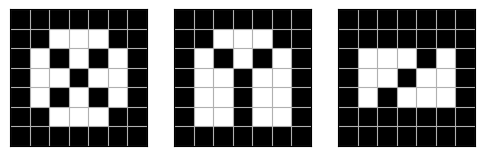

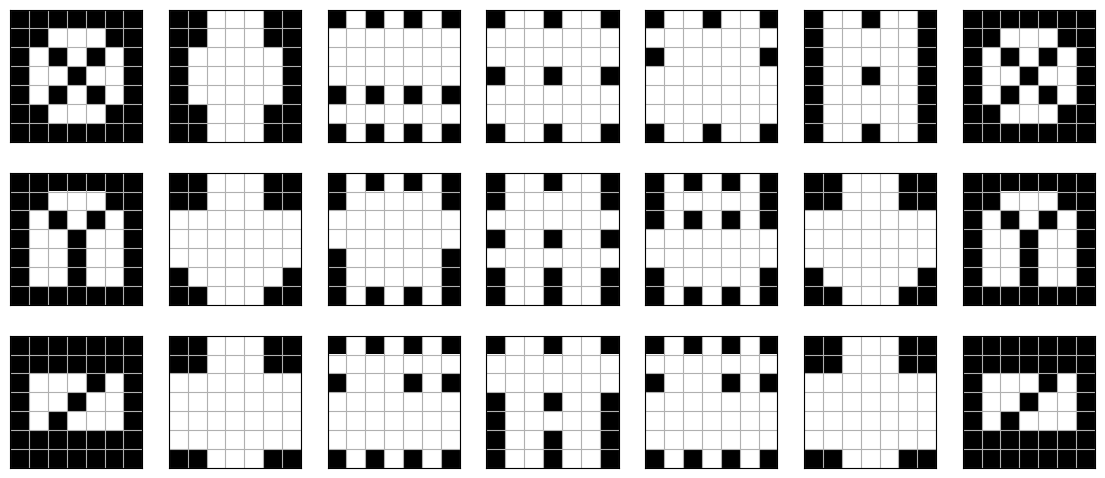

134

In [11]:
design2 = test_goal.create_base_design()
display(design2.projections_fig())
display(design2.slices_fig())
display(design2.vox.sum())

In [13]:
voxart.Masks(4)

## find_removable

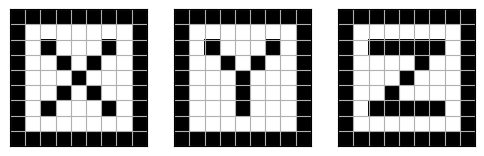

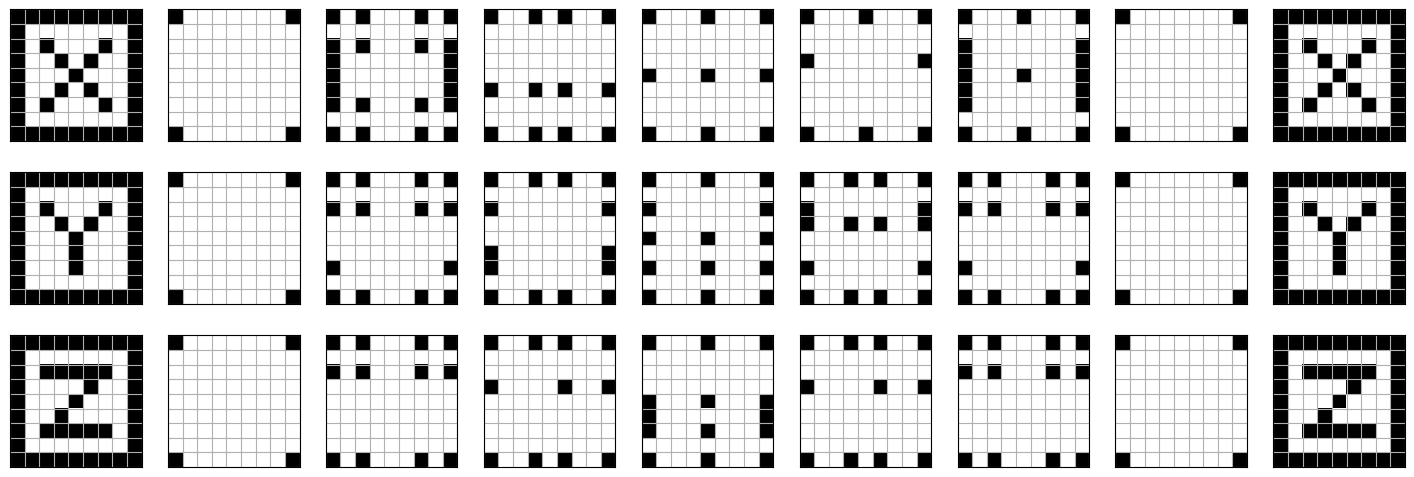

In [14]:
test_goal = voxart.Goal.from_arrays(
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0)
)
#display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())
design = test_goal.create_base_design()
display(design.slices_fig())

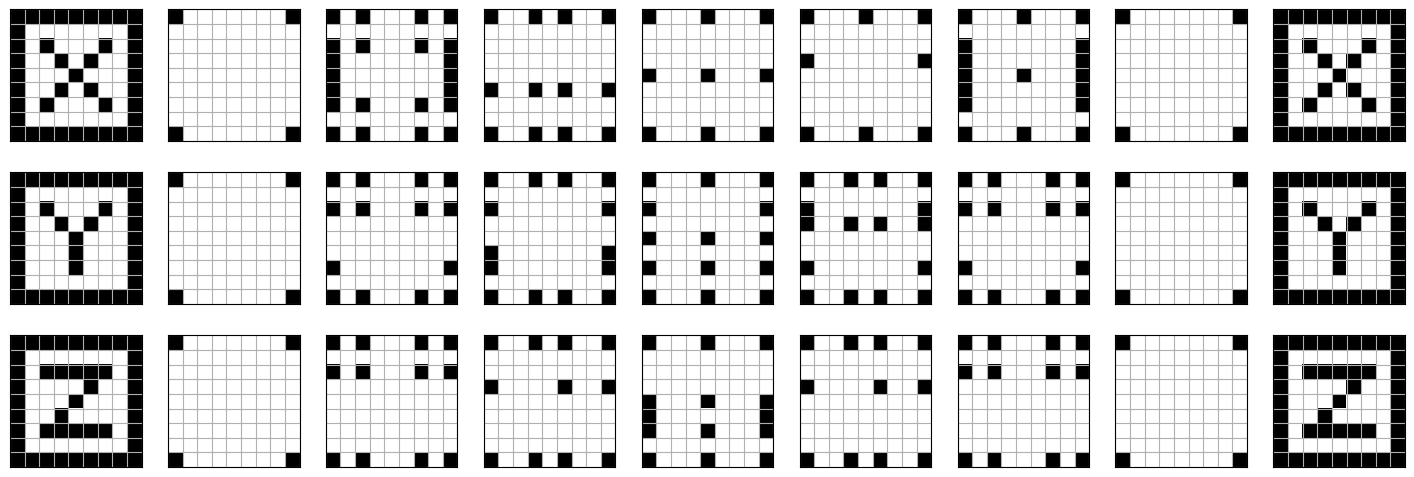

In [15]:
voxart.Design(design.find_removable_slow()).slices_fig()

Started with 158, ended with 118, removed 40


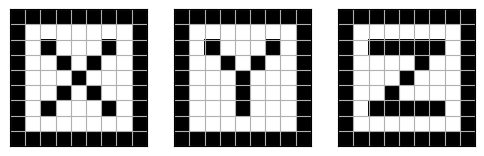

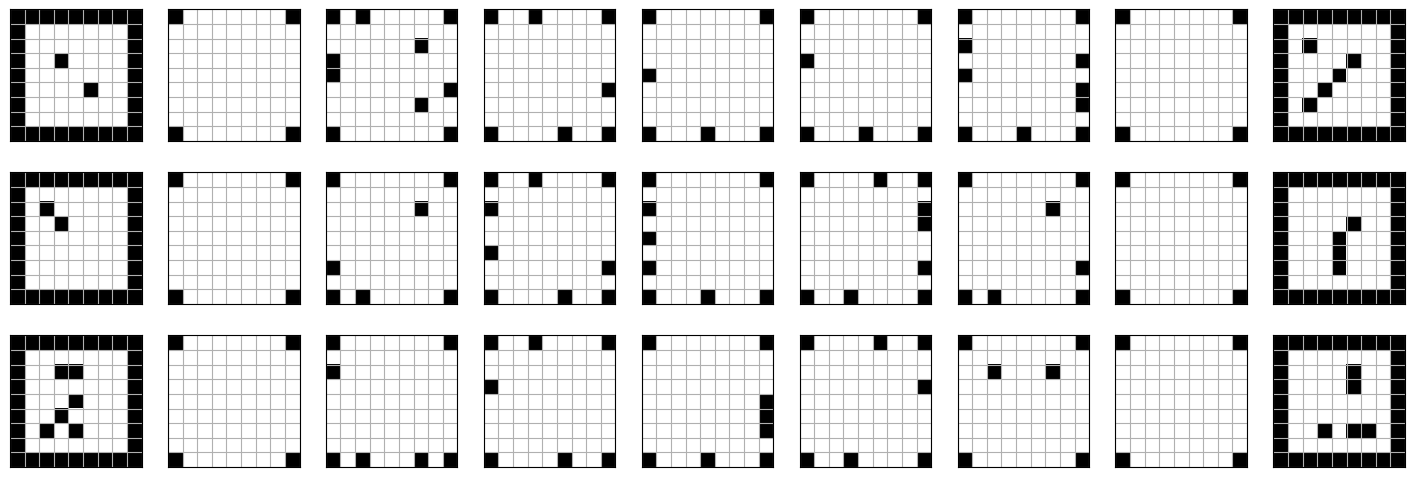

In [16]:
base_design = test_goal.create_base_design()
trim_design = voxart.search_design_random(test_goal)
start_cnt = np.sum(base_design.vox)
end_cnt = np.sum(trim_design.vox)
print(f"Started with {start_cnt}, ended with {end_cnt}, removed {start_cnt - end_cnt}")
display(trim_design.projections_fig())
display(trim_design.slices_fig())

hi
Started with 158, ended with 111, removed 47


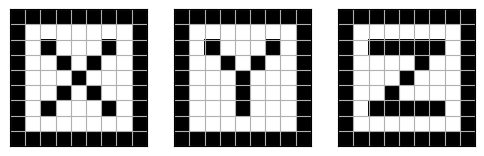

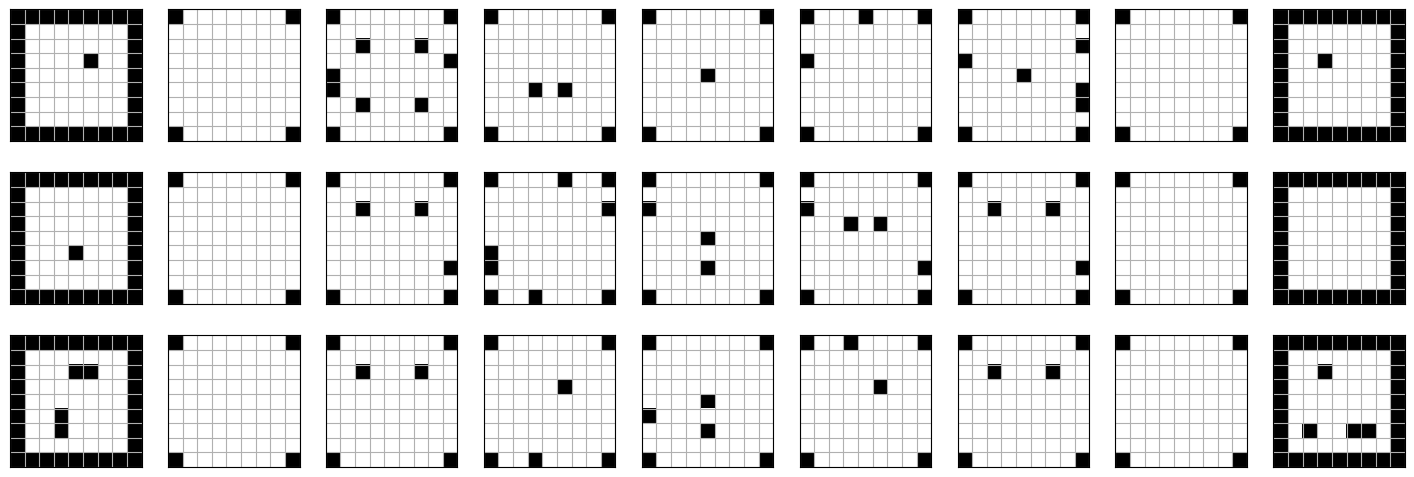

In [18]:
base_design = test_goal.create_base_design()
trim_design = voxart.search_design_random_face_first(test_goal)
start_cnt = np.sum(base_design.vox)
end_cnt = np.sum(trim_design.vox)
print(f"Started with {start_cnt}, ended with {end_cnt}, removed {start_cnt - end_cnt}")
display(trim_design.projections_fig())
display(trim_design.slices_fig())

In [18]:
dir(voxart)

['Design',
 'Goal',
 'Iterator',
 'Optional',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'annotations',
 'copy',
 'create_masks',
 'itertools',
 'np',
 'pd',
 'plt',
 'search',
 'search_design_random',
 'search_design_random_face_first']

In [21]:
%reload_ext autoreload

In [ ]:
%pdb 0

In [55]:
cnts = []
for i in range(5000):
    trim_design = voxart.create_design_random(test_goal)
    cnts.append(np.sum(trim_design.vox))
print(sorted(cnts))



[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88,